[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


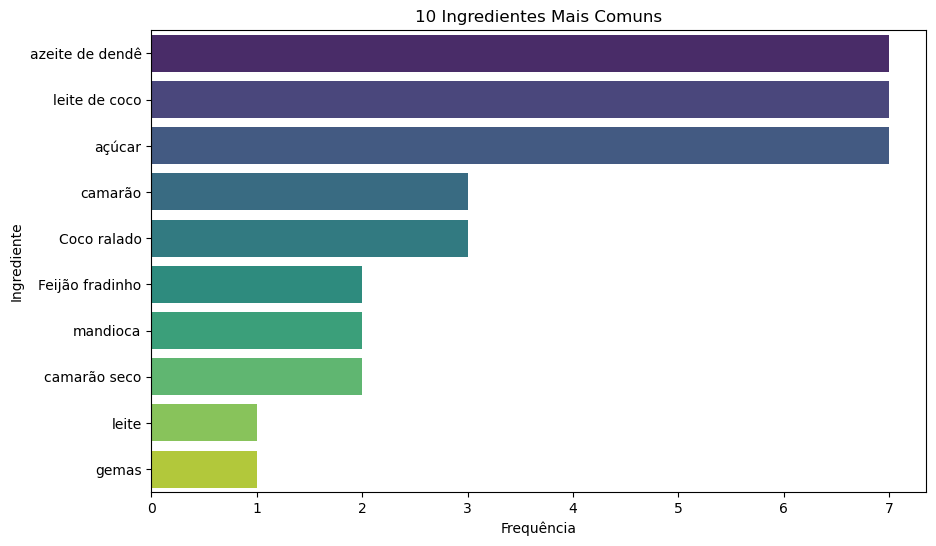

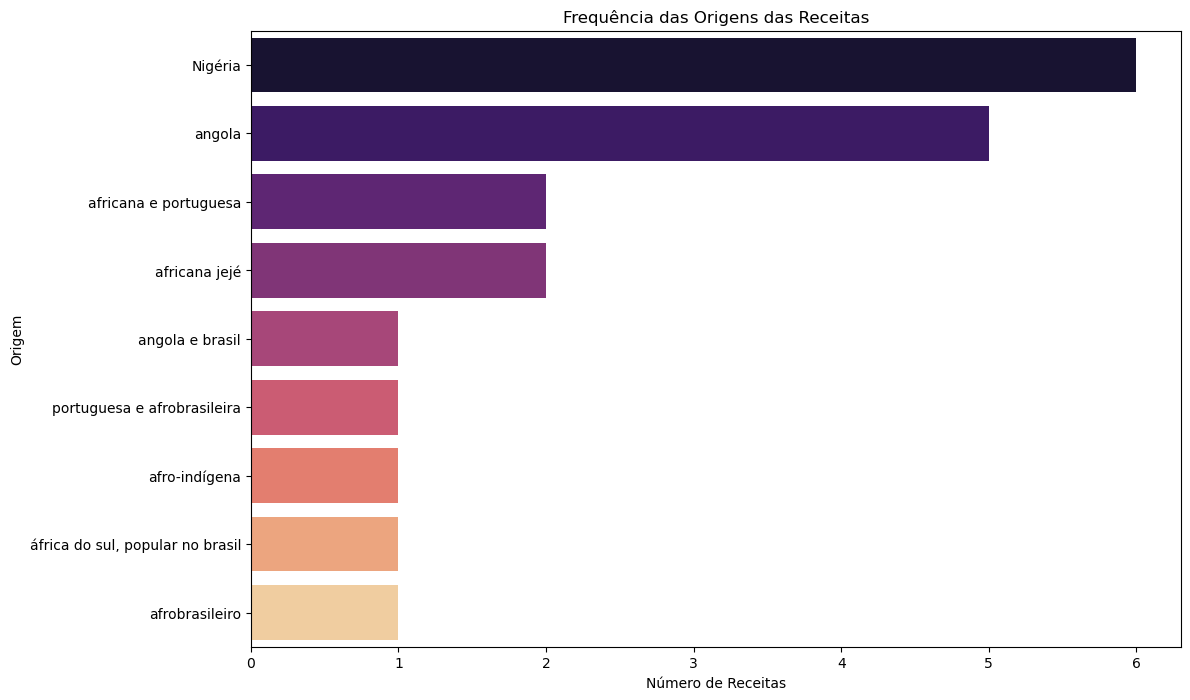

Origens das receitas e suas contagens:
Origem
Nigéria                             6
angola                              5
africana e portuguesa               2
africana jejé                       2
angola e brasil                     1
portuguesa e afrobrasileira         1
afro-indígena                       1
áfrica do sul, popular no brasil    1
afrobrasileiro                      1
Name: count, dtype: int64

Receitas e suas receitas mais semelhantes no modo de preparo:
Acarajé -> Cocada Angolana
Vatapá -> Vatapá
Moqueca de Peixe -> Moqueca de Peixe
Bobó de Camarão -> Vatapá
Caruru -> Xinxim
Abará -> Quindim
Muqueca de Frutos do Mar -> Moqueca de Peixe
Feijoada Baiana -> Bobó de Camarão
Bobó de Frango -> Vatapá
Xinxim -> Moqueca de Peixe
Angu -> Bobó de Camarão
Quibebe -> Bobó de Camarão
Cocada -> Cocada Angolana
Quindim -> Abará
Mungunzá (Canjica) -> Bobó de Camarão
Pamonha -> Bobó de Camarão
Cuscuz Doce -> Bobó de Camarão
Melketert -> Quindim
Cocada Angolana -> Cocada Angolana
Brig

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np  # Importar numpy

# Carregar stop words em português
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

# Carregar o arquivo CSV
file_path = 'C://Users//pc//Desktop//Cr_redes//Receitas brasileiras - Afro-Brasileiro.csv'
recipes_df = pd.read_csv(file_path)

# Preprocessamento dos dados
recipes_df['Modo de Preparo'] = recipes_df['Modo de Preparo'].str.lower()

# Padronizar a origem "Nigéria"
def standardize_origin(origin):
    origin = origin.lower()
    if 'nigéria' in origin:
        return 'Nigéria'
    return origin

recipes_df['Origem'] = recipes_df['Origem'].apply(standardize_origin)

# Aplicação do TF-IDF com stop words em português
vectorizer = TfidfVectorizer(stop_words=stop_words_pt)
tfidf_matrix = vectorizer.fit_transform(recipes_df['Modo de Preparo'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Transformar a matriz de similaridade em um DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=recipes_df['Receita'], columns=recipes_df['Receita'])

# Identificação dos ingredientes mais frequentemente utilizados
ingredient_list = recipes_df['Ingredientes'].str.split(', ').explode()
ingredient_freq = ingredient_list.value_counts()

# Visualizar os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_freq.values[:10], y=ingredient_freq.index[:10], palette='viridis')
plt.title('10 Ingredientes Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Ingrediente')
plt.show()

# Agrupamento das regiões de origem dos ingredientes
region_ingredients = recipes_df.groupby('Origem')['Ingredientes'].apply(lambda x: ', '.join(x)).reset_index()

# Exibir todas as origens únicas e suas contagens
origem_freq = recipes_df['Origem'].value_counts()

# Visualizar a frequência das origens em um gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=origem_freq.values, y=origem_freq.index, palette='magma')
plt.title('Frequência das Origens das Receitas')
plt.xlabel('Número de Receitas')
plt.ylabel('Origem')
plt.show()

print("Origens das receitas e suas contagens:")
print(origem_freq)

# Encontrar a receita mais semelhante para cada receita
most_similar_recipes = {}
for idx, recipe in enumerate(recipes_df['Receita']):
    similar_idx = cosine_sim[idx].argsort()[-2]  # O índice -2 é a receita mais semelhante (excluindo a própria)
    most_similar_recipes[recipe] = recipes_df['Receita'].iloc[similar_idx]

print("\nReceitas e suas receitas mais semelhantes no modo de preparo:")
for recipe, similar_recipe in most_similar_recipes.items():
    print(f"{recipe} -> {similar_recipe}")

# Calcular a porcentagem média de similaridade
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
average_similarity_percentage = np.mean(similarity_scores) * 100

print(f"\nPorcentagem média de similaridade entre as receitas: {average_similarity_percentage:.2f}%")

# Visualização dos dados processados
print("\nMatriz de Similaridade do Cosseno:")
print(cosine_sim_df)
print("\nFrequência dos Ingredientes:")
print(ingredient_freq)
print("\nIngredientes por Região:")
print(region_ingredients)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


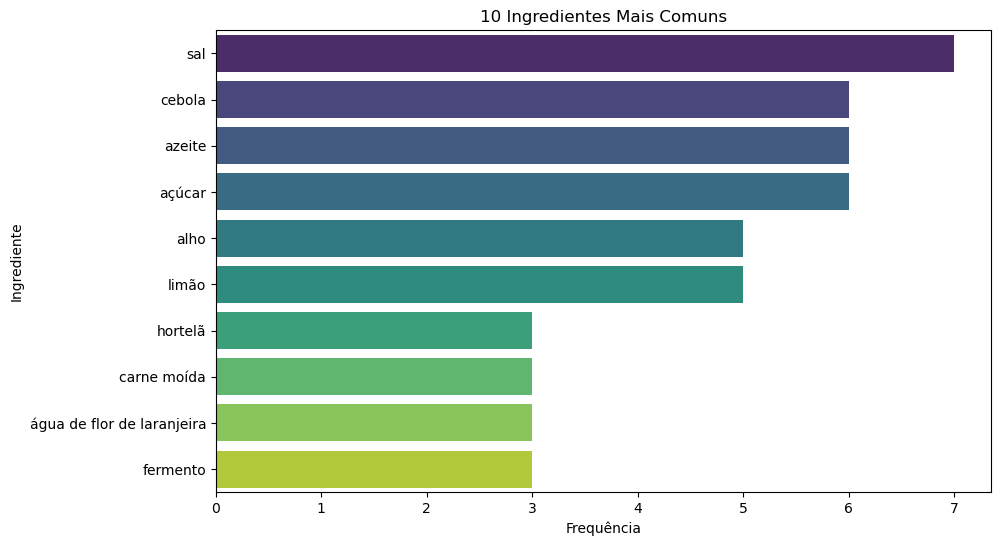

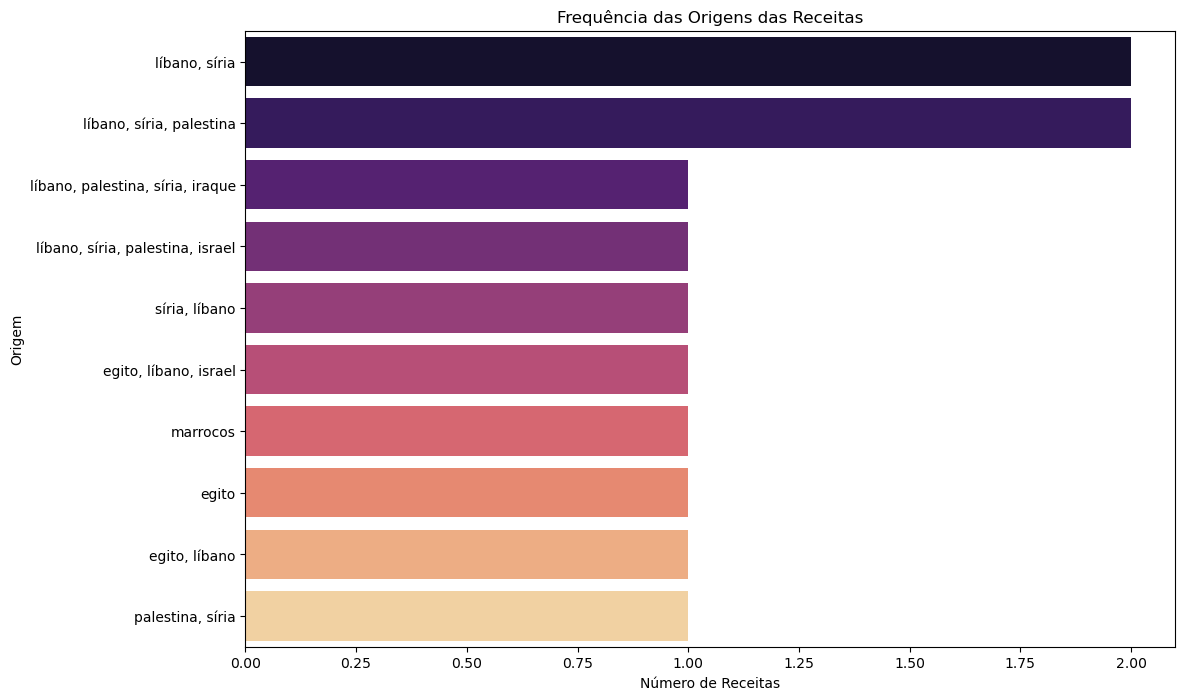

Origens das receitas e suas contagens:
Origem
líbano, síria                        2
líbano, síria, palestina             2
líbano, palestina, síria, iraque​    1
líbano, síria, palestina, israel     1
síria, líbano                        1
egito, líbano, israel                1
marrocos                             1
egito                                1
egito, líbano                        1
palestina, síria                     1
Name: count, dtype: int64

Receitas e suas receitas mais semelhantes no modo de preparo:
Kibe Assado -> Doce de Semolina (Basbousa)
Esfiha de Carne -> Ataif
Homus -> Baba Ghanoush
Tabule -> Doce de Semolina (Basbousa)
Baba Ghanoush -> Homus
Charuto de Repolho -> Esfiha de Carne
Falafel -> Homus
Arroz Marroquino -> Charuto de Repolho
Doce de Semolina (Basbousa) -> Ataif
Mahalabia -> Knafeh
Knafeh -> Ataif
Ataif -> Knafeh

Porcentagem média de similaridade entre as receitas: 10.99%

Matriz de Similaridade do Cosseno:
Receita                      Kibe Assado  E

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np  # Importar numpy

# Carregar stop words em português
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

# Carregar o arquivo CSV
file_path = 'C://Users//pc//Desktop//Cr_redes//Receitas brasileiras - Arabe-brasileira.csv'
recipes_df = pd.read_csv(file_path)

# Preprocessamento dos dados
recipes_df['Modo de Preparo'] = recipes_df['Modo de Preparo'].str.lower()

# Padronizar a origem "Nigéria"
def standardize_origin(origin):
    origin = origin.lower()
    if 'nigéria' in origin:
        return 'Nigéria'
    return origin

recipes_df['Origem'] = recipes_df['Origem'].apply(standardize_origin)

# Aplicação do TF-IDF com stop words em português
vectorizer = TfidfVectorizer(stop_words=stop_words_pt)
tfidf_matrix = vectorizer.fit_transform(recipes_df['Modo de Preparo'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Transformar a matriz de similaridade em um DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=recipes_df['Receita'], columns=recipes_df['Receita'])

# Identificação dos ingredientes mais frequentemente utilizados
ingredient_list = recipes_df['Ingredientes'].str.split(', ').explode()
ingredient_freq = ingredient_list.value_counts()

# Visualizar os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_freq.values[:10], y=ingredient_freq.index[:10], palette='viridis')
plt.title('10 Ingredientes Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Ingrediente')
plt.show()

# Agrupamento das regiões de origem dos ingredientes
region_ingredients = recipes_df.groupby('Origem')['Ingredientes'].apply(lambda x: ', '.join(x)).reset_index()

# Exibir todas as origens únicas e suas contagens
origem_freq = recipes_df['Origem'].value_counts()

# Visualizar a frequência das origens em um gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=origem_freq.values, y=origem_freq.index, palette='magma')
plt.title('Frequência das Origens das Receitas')
plt.xlabel('Número de Receitas')
plt.ylabel('Origem')
plt.show()

print("Origens das receitas e suas contagens:")
print(origem_freq)

# Encontrar a receita mais semelhante para cada receita
most_similar_recipes = {}
for idx, recipe in enumerate(recipes_df['Receita']):
    similar_idx = cosine_sim[idx].argsort()[-2]  # O índice -2 é a receita mais semelhante (excluindo a própria)
    most_similar_recipes[recipe] = recipes_df['Receita'].iloc[similar_idx]

print("\nReceitas e suas receitas mais semelhantes no modo de preparo:")
for recipe, similar_recipe in most_similar_recipes.items():
    print(f"{recipe} -> {similar_recipe}")

# Calcular a porcentagem média de similaridade
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
average_similarity_percentage = np.mean(similarity_scores) * 100

print(f"\nPorcentagem média de similaridade entre as receitas: {average_similarity_percentage:.2f}%")

# Visualização dos dados processados
print("\nMatriz de Similaridade do Cosseno:")
print(cosine_sim_df)
print("\nFrequência dos Ingredientes:")
print(ingredient_freq)
print("\nIngredientes por Região:")
print(region_ingredients)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


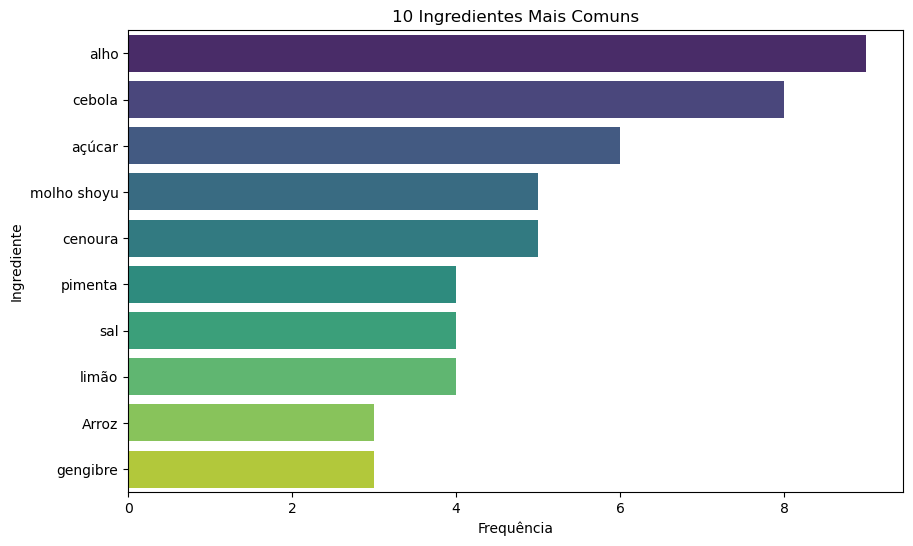

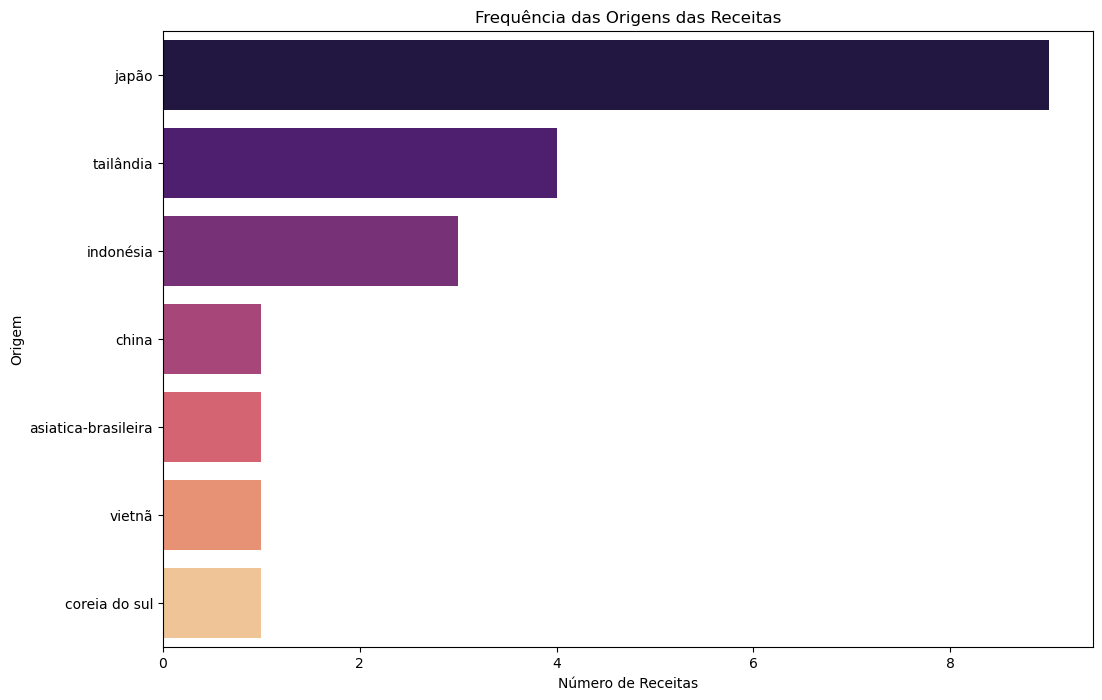

Origens das receitas e suas contagens:
Origem
japão                  9
tailândia              4
indonésia              3
china                  1
asiatica-brasileira    1
vietnã                 1
coreia do sul          1
Name: count, dtype: int64

Receitas e suas receitas mais semelhantes no modo de preparo:
Frango Xadrez -> Yakisoba
Yakisoba -> Bifum com Legumes
Sushi -> Temaki
Bifum com Legumes -> Yakisoba
Temaki -> Sushi
Bolinho de Arroz com Gergelim -> Mochi
Harumaki (Rolinho Primavera) -> Kare Raisu (Curry Japonês)
Mochi -> Bolinho de Arroz com Gergelim
Pudim de Chá Verde -> Mochi
Tapioca com Frutas Tropicais -> Harumaki (Rolinho Primavera)
Som Tam -> Pudim de Chá Verde
Khao Soi -> Pad Thai
Pad Thai -> Khao Pad (Arroz Frito)
Nasi Padang -> Kare Raisu (Curry Japonês)
Sate Padang -> Bulgogi
Bakso -> Kare Raisu (Curry Japonês)
Khao Pad (Arroz Frito) -> Pad Thai
Pho -> Kare Raisu (Curry Japonês)
Bulgogi -> Sate Padang
Kare Raisu (Curry Japonês) -> Nasi Padang

Porcentagem média de sim

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np  # Importar numpy

# Carregar stop words em português
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

# Carregar o arquivo CSV
file_path = 'C://Users//pc//Desktop//Cr_redes//Receitas brasileiras - Asiatica-brasileira.csv'
recipes_df = pd.read_csv(file_path)

# Preprocessamento dos dados
recipes_df['Modo de Preparo'] = recipes_df['Modo de Preparo'].str.lower()

# Padronizar a origem "Nigéria"
def standardize_origin(origin):
    origin = origin.lower()
    if 'nigéria' in origin:
        return 'Nigéria'
    return origin

recipes_df['Origem'] = recipes_df['Origem'].apply(standardize_origin)

# Aplicação do TF-IDF com stop words em português
vectorizer = TfidfVectorizer(stop_words=stop_words_pt)
tfidf_matrix = vectorizer.fit_transform(recipes_df['Modo de Preparo'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Transformar a matriz de similaridade em um DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=recipes_df['Receita'], columns=recipes_df['Receita'])

# Identificação dos ingredientes mais frequentemente utilizados
ingredient_list = recipes_df['Ingredientes'].str.split(', ').explode()
ingredient_freq = ingredient_list.value_counts()

# Visualizar os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_freq.values[:10], y=ingredient_freq.index[:10], palette='viridis')
plt.title('10 Ingredientes Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Ingrediente')
plt.show()

# Agrupamento das regiões de origem dos ingredientes
region_ingredients = recipes_df.groupby('Origem')['Ingredientes'].apply(lambda x: ', '.join(x)).reset_index()

# Exibir todas as origens únicas e suas contagens
origem_freq = recipes_df['Origem'].value_counts()

# Visualizar a frequência das origens em um gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=origem_freq.values, y=origem_freq.index, palette='magma')
plt.title('Frequência das Origens das Receitas')
plt.xlabel('Número de Receitas')
plt.ylabel('Origem')
plt.show()

print("Origens das receitas e suas contagens:")
print(origem_freq)

# Encontrar a receita mais semelhante para cada receita
most_similar_recipes = {}
for idx, recipe in enumerate(recipes_df['Receita']):
    similar_idx = cosine_sim[idx].argsort()[-2]  # O índice -2 é a receita mais semelhante (excluindo a própria)
    most_similar_recipes[recipe] = recipes_df['Receita'].iloc[similar_idx]

print("\nReceitas e suas receitas mais semelhantes no modo de preparo:")
for recipe, similar_recipe in most_similar_recipes.items():
    print(f"{recipe} -> {similar_recipe}")

# Calcular a porcentagem média de similaridade
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
average_similarity_percentage = np.mean(similarity_scores) * 100

print(f"\nPorcentagem média de similaridade entre as receitas: {average_similarity_percentage:.2f}%")

# Visualização dos dados processados
print("\nMatriz de Similaridade do Cosseno:")
print(cosine_sim_df)
print("\nFrequência dos Ingredientes:")
print(ingredient_freq)
print("\nIngredientes por Região:")
print(region_ingredients)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


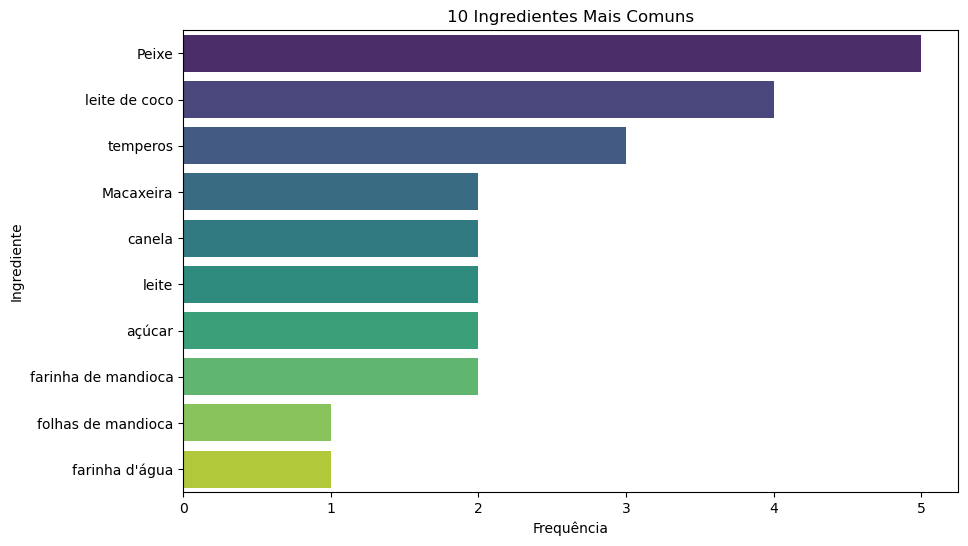

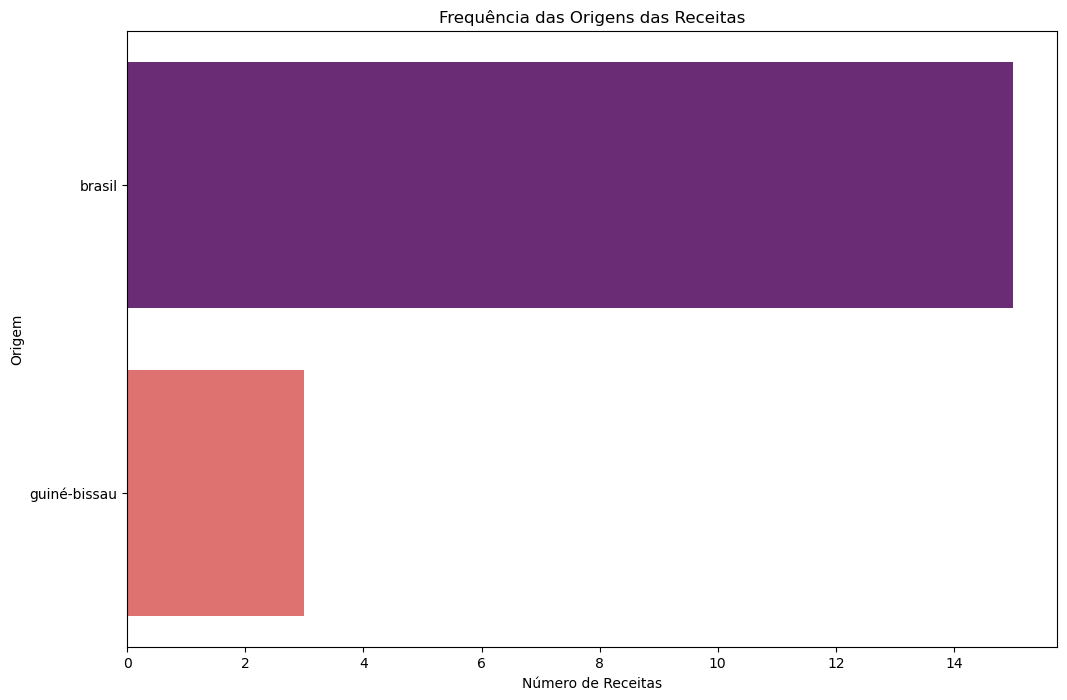

Origens das receitas e suas contagens:
Origem
brasil          15
guiné-bissau     3
Name: count, dtype: int64

Receitas e suas receitas mais semelhantes no modo de preparo:
Pamonha -> Mutap
Bolo de Milho -> Pamonha
Paçoca de Banana-da-Terra -> Caiçuma de Macaxeira
Moqueca -> Pirarucu de Casaca
Farofa de Caju com Mocororó -> Mujica de Peixe
Canjica -> Bijajica
Kanape -> Bijajica
Paparuto -> Matrinxã na Brasa
Caiçuma de Macaxeira -> Paçoca de Banana-da-Terra
Asa Mikãri -> Kanape
Damorida -> Kinhapira
Mujica de Peixe -> Farofa de Caju com Mocororó
Mutap -> Pamonha
Pirarucu de Casaca -> Mujica de Peixe
Matrinxã na Brasa -> Paparuto
Bijajica -> Canjica
Kinhapira -> Damorida
Pirão de Peixe -> Kinhapira

Porcentagem média de similaridade entre as receitas: 7.61%

Matriz de Similaridade do Cosseno:
Receita                       Pamonha  Bolo de Milho  \
Receita                                                
Pamonha                      1.000000       0.247987   
Bolo de Milho                0

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np  # Importar numpy

# Carregar stop words em português
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

# Carregar o arquivo CSV
file_path = 'C://Users//pc//Desktop//Cr_redes//Receitas brasileiras - Indígena-brasileira.csv'
recipes_df = pd.read_csv(file_path)

# Preprocessamento dos dados
recipes_df['Modo de Preparo'] = recipes_df['Modo de Preparo'].str.lower()

# Padronizar a origem "Nigéria"
def standardize_origin(origin):
    origin = origin.lower()
    if 'nigéria' in origin:
        return 'Nigéria'
    return origin

recipes_df['Origem'] = recipes_df['Origem'].apply(standardize_origin)

# Aplicação do TF-IDF com stop words em português
vectorizer = TfidfVectorizer(stop_words=stop_words_pt)
tfidf_matrix = vectorizer.fit_transform(recipes_df['Modo de Preparo'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Transformar a matriz de similaridade em um DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=recipes_df['Receita'], columns=recipes_df['Receita'])

# Identificação dos ingredientes mais frequentemente utilizados
ingredient_list = recipes_df['Ingredientes'].str.split(', ').explode()
ingredient_freq = ingredient_list.value_counts()

# Visualizar os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_freq.values[:10], y=ingredient_freq.index[:10], palette='viridis')
plt.title('10 Ingredientes Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Ingrediente')
plt.show()

# Agrupamento das regiões de origem dos ingredientes
region_ingredients = recipes_df.groupby('Origem')['Ingredientes'].apply(lambda x: ', '.join(x)).reset_index()

# Exibir todas as origens únicas e suas contagens
origem_freq = recipes_df['Origem'].value_counts()

# Visualizar a frequência das origens em um gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=origem_freq.values, y=origem_freq.index, palette='magma')
plt.title('Frequência das Origens das Receitas')
plt.xlabel('Número de Receitas')
plt.ylabel('Origem')
plt.show()

print("Origens das receitas e suas contagens:")
print(origem_freq)

# Encontrar a receita mais semelhante para cada receita
most_similar_recipes = {}
for idx, recipe in enumerate(recipes_df['Receita']):
    similar_idx = cosine_sim[idx].argsort()[-2]  # O índice -2 é a receita mais semelhante (excluindo a própria)
    most_similar_recipes[recipe] = recipes_df['Receita'].iloc[similar_idx]

print("\nReceitas e suas receitas mais semelhantes no modo de preparo:")
for recipe, similar_recipe in most_similar_recipes.items():
    print(f"{recipe} -> {similar_recipe}")

# Calcular a porcentagem média de similaridade
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
average_similarity_percentage = np.mean(similarity_scores) * 100

print(f"\nPorcentagem média de similaridade entre as receitas: {average_similarity_percentage:.2f}%")

# Visualização dos dados processados
print("\nMatriz de Similaridade do Cosseno:")
print(cosine_sim_df)
print("\nFrequência dos Ingredientes:")
print(ingredient_freq)
print("\nIngredientes por Região:")
print(region_ingredients)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


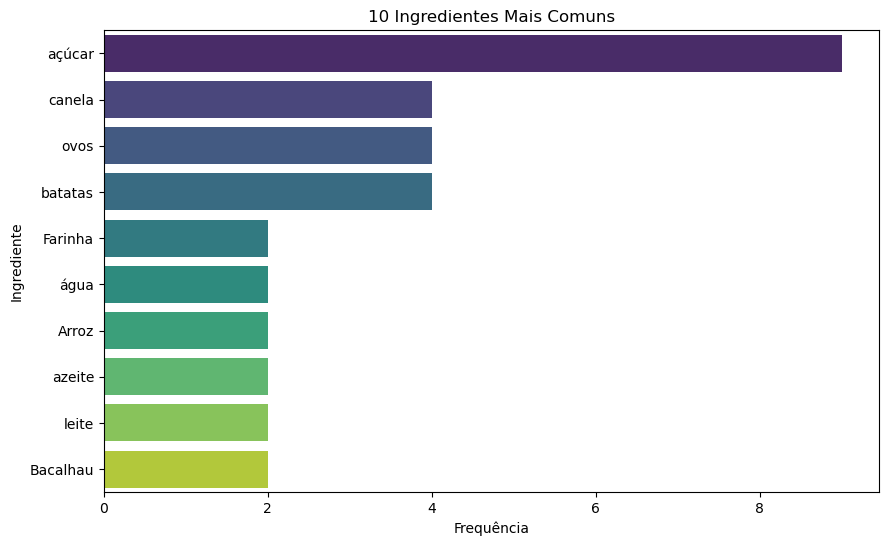

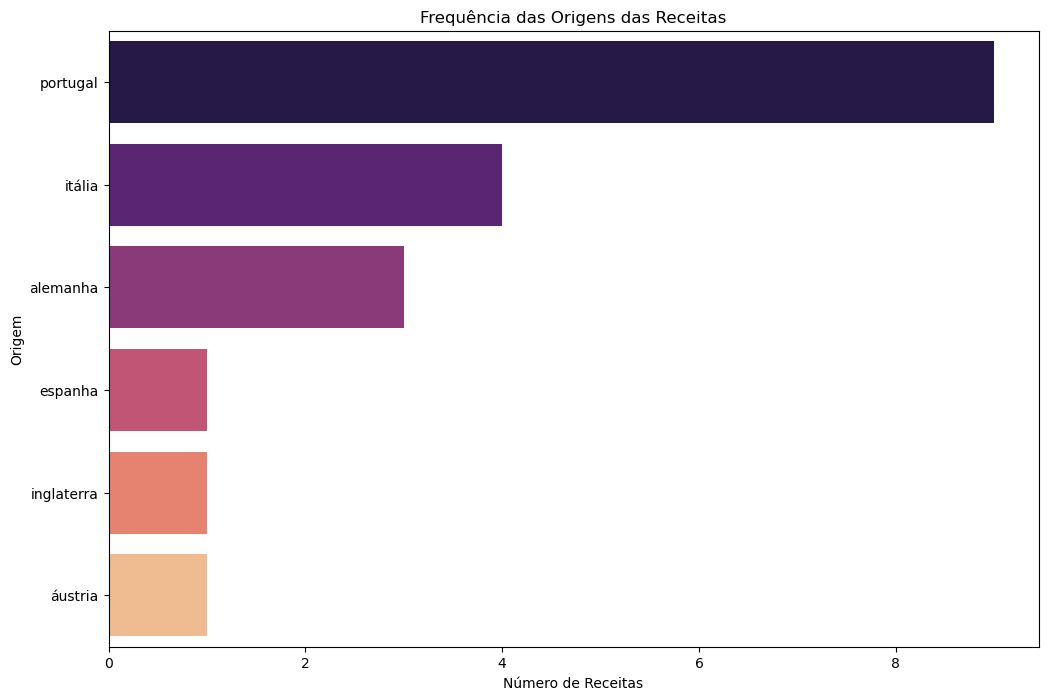

Origens das receitas e suas contagens:
Origem
portugal      9
itália        4
alemanha      3
espanha       1
inglaterra    1
áustria       1
Name: count, dtype: int64

Receitas e suas receitas mais semelhantes no modo de preparo:
Pizza -> Nhoque
Bacalhau à Gomes de Sá -> Canjica
Paella -> Risoto
Eisbein -> Bacalhau
Fish and Chips -> Bacalhau
Nhoque -> Pizza
Bacalhau -> Nhoque
Polenta -> Risoto
Risoto -> Polenta
Torta Alemã -> Risoto
Strudel de Maçã -> Cuca
Pudim de Leite -> Bolo de Mandioca
Quindim -> Quindim
Rabanada -> Arroz Doce
Arroz Doce -> Risoto
Bolo de Mandioca -> Quindim
Canjica -> Bacalhau à Gomes de Sá
Quentão -> Bolo de Mandioca
Cuca -> Pizza

Porcentagem média de similaridade entre as receitas: 9.50%

Matriz de Similaridade do Cosseno:
Receita                    Pizza  Bacalhau à Gomes de Sá    Paella   Eisbein  \
Receita                                                                        
Pizza                   1.000000                0.077760  0.000000  0.000000   


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import numpy as np  # Importar numpy

# Carregar stop words em português
nltk.download('stopwords')
stop_words_pt = stopwords.words('portuguese')

# Carregar o arquivo CSV
file_path = 'C://Users//pc//Desktop//Cr_redes//Receitas brasileiras - Europeia-brasileira.csv'
recipes_df = pd.read_csv(file_path)

# Preprocessamento dos dados
recipes_df['Modo de Preparo'] = recipes_df['Modo de Preparo'].str.lower()

# Padronizar a origem "Nigéria"
def standardize_origin(origin):
    origin = origin.lower()
    if 'nigéria' in origin:
        return 'Nigéria'
    return origin

recipes_df['Origem'] = recipes_df['Origem'].apply(standardize_origin)

# Aplicação do TF-IDF com stop words em português
vectorizer = TfidfVectorizer(stop_words=stop_words_pt)
tfidf_matrix = vectorizer.fit_transform(recipes_df['Modo de Preparo'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Transformar a matriz de similaridade em um DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=recipes_df['Receita'], columns=recipes_df['Receita'])

# Identificação dos ingredientes mais frequentemente utilizados
ingredient_list = recipes_df['Ingredientes'].str.split(', ').explode()
ingredient_freq = ingredient_list.value_counts()

# Visualizar os 10 ingredientes mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_freq.values[:10], y=ingredient_freq.index[:10], palette='viridis')
plt.title('10 Ingredientes Mais Comuns')
plt.xlabel('Frequência')
plt.ylabel('Ingrediente')
plt.show()

# Agrupamento das regiões de origem dos ingredientes
region_ingredients = recipes_df.groupby('Origem')['Ingredientes'].apply(lambda x: ', '.join(x)).reset_index()

# Exibir todas as origens únicas e suas contagens
origem_freq = recipes_df['Origem'].value_counts()

# Visualizar a frequência das origens em um gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=origem_freq.values, y=origem_freq.index, palette='magma')
plt.title('Frequência das Origens das Receitas')
plt.xlabel('Número de Receitas')
plt.ylabel('Origem')
plt.show()

print("Origens das receitas e suas contagens:")
print(origem_freq)

# Encontrar a receita mais semelhante para cada receita
most_similar_recipes = {}
for idx, recipe in enumerate(recipes_df['Receita']):
    similar_idx = cosine_sim[idx].argsort()[-2]  # O índice -2 é a receita mais semelhante (excluindo a própria)
    most_similar_recipes[recipe] = recipes_df['Receita'].iloc[similar_idx]

print("\nReceitas e suas receitas mais semelhantes no modo de preparo:")
for recipe, similar_recipe in most_similar_recipes.items():
    print(f"{recipe} -> {similar_recipe}")

# Calcular a porcentagem média de similaridade
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
average_similarity_percentage = np.mean(similarity_scores) * 100

print(f"\nPorcentagem média de similaridade entre as receitas: {average_similarity_percentage:.2f}%")

# Visualização dos dados processados
print("\nMatriz de Similaridade do Cosseno:")
print(cosine_sim_df)
print("\nFrequência dos Ingredientes:")
print(ingredient_freq)
print("\nIngredientes por Região:")
print(region_ingredients)
